In [72]:
import numpy as np
import networkx as nx
import cirq
import qtree
import matplotlib

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
def get_test_circ_filename(root, size, depth=10, id_=0):
    grid = f'{size}x{size}'
    return f'{root}/inst/cz_v2/{grid}/inst_{grid}_{depth}_{id_}.txt'

test_file = get_test_circ_filename('./qtree/test_circuits', 4)
test_file

'./qtree/test_circuits/inst/cz_v2/4x4/inst_4x4_10_0.txt'

In [26]:
nqubits, circ = qtree.read_circuit_file(test_file)

2020-02-24 17:35:21,445- INFO•	reading file ./qtree/test_circuits/inst/cz_v2/4x4/inst_4x4_10_0.txt
2020-02-24 17:35:21,450- INFO•	There are 16 qubits in circuit


In [27]:
for layer in circ:
    print(layer)

[H(0), H(1), H(2), H(3), H(4), H(5), H(6), H(7), H(8), H(9), H(10), H(11), H(12), H(13), H(14), H(15)]
[cZ(0,1), cZ(6,7), cZ(8,9), cZ(14,15), T(2), T(3), T(4), T(5), T(10), T(11), T(12), T(13)]
[cZ(4,8), cZ(6,10), Y_1_2(0), Y_1_2(1), X_1_2(7), X_1_2(9), Y_1_2(14), X_1_2(15)]
[cZ(1,2), cZ(9,10), T(0), Y_1_2(4), X_1_2(6), T(7), X_1_2(8), T(14), T(15)]
[cZ(0,4), cZ(9,13), cZ(2,6), cZ(11,15), Y_1_2(1), T(8), Y_1_2(10)]
[cZ(2,3), cZ(4,5), cZ(10,11), cZ(12,13), Y_1_2(0), T(1), X_1_2(6), Y_1_2(9), Y_1_2(15)]
[cZ(5,9), cZ(7,11), T(0), X_1_2(2), Y_1_2(3), Y_1_2(4), T(6), Y_1_2(10), Y_1_2(12), X_1_2(13), T(15)]
[cZ(5,6), cZ(13,14), T(2), T(3), T(4), Y_1_2(7), Y_1_2(9), T(10), Y_1_2(11), T(12)]
[cZ(8,12), cZ(1,5), cZ(10,14), cZ(3,7), X_1_2(6), T(9), T(11), X_1_2(13)]
[cZ(0,1), cZ(6,7), cZ(8,9), cZ(14,15), X_1_2(3), Y_1_2(5), Y_1_2(10), Y_1_2(12), T(13)]
[H(0), H(1), H(2), H(3), H(4), H(5), H(6), H(7), H(8), H(9), H(10), H(11), H(12), H(13), H(14), H(15)]


In [28]:
graph = qtree.graph_model.circ2graph(nqubits, circ)

2020-02-24 17:35:22,955- INFO•	Generated graph with 78 nodes and 115 edges


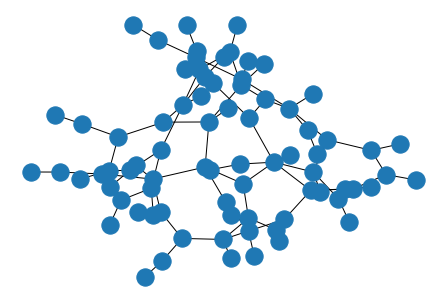

In [29]:
nx.draw(graph)

In [34]:
peo, tw = qtree.graph_model.get_peo(graph)

2020-02-24 17:40:11,991- INFO•	generating config file output/quickbb.15781565.cnf
2020-02-24 17:40:11,997- INFO•	excecuting quickbb: ./quickbb/quickbb_64  --min-fill-ordering --time 60 --cnffile output/quickbb.15781565.cnf 


In [36]:
print(peo)

[v_45, v_44, v_43, v_42, v_37, v_36, v_35, v_34, v_93, v_92, v_91, v_90, v_89, v_88, v_87, v_86, v_85, v_84, v_83, v_82, v_81, v_80, v_79, v_78, v_31, v_30, v_29, v_28, v_27, v_26, v_25, v_24, v_23, v_22, v_21, v_20, v_19, v_18, v_17, v_16, v_76, v_75, v_74, v_72, v_69, v_53, v_51, v_50, v_48, v_47, v_41, v_38, v_32, v_73, v_61, v_58, v_77, v_66, v_56, v_67, v_63, v_33, v_59, v_46, v_60, v_70, v_40, v_65, v_52, v_55, v_39, v_62, v_57, v_68, v_54, v_64, v_49, v_71]


In [46]:
buckets, data_dict, bra, ket = \
    qtree.optimizer.circ2buckets(nqubits, circ)
print(bra, ket)

[o_0, o_1, o_2, o_3, o_4, o_5, o_6, o_7, o_8, o_9, o_10, o_11, o_12, o_13, o_14, o_15] [i_0, i_1, i_2, i_3, i_4, i_5, i_6, i_7, i_8, i_9, i_10, i_11, i_12, i_13, i_14, i_15]


2020-02-24 18:00:51,895- INFO•	Clique of size 16 on vertices: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)


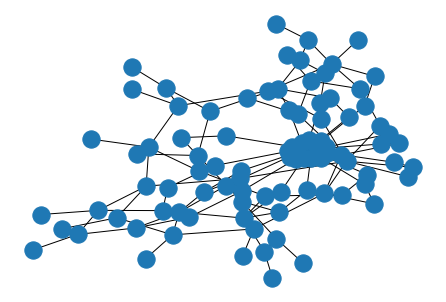

In [53]:
graph_initial = qtree.graph_model.buckets2graph(
    buckets, ignore_variables=ket)

graph_full = qtree.graph_model.make_clique_on(graph_initial, bra)

<IPython.core.display.Javascript object>


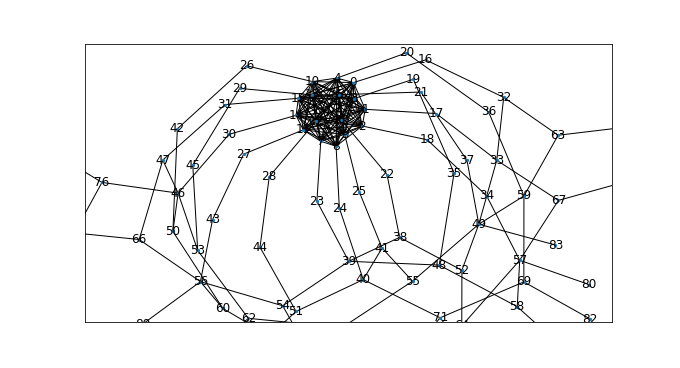

In [84]:
%matplotlib notebook 

def draw_graph(graph):
    layout = nx.kamada_kawai_layout(graph)
    nx.draw_networkx_nodes(graph, layout, node_size=5)
    nx.draw_networkx_edges(graph, layout)
    nx.draw_networkx_labels(graph, layout)
    
draw_graph(graph_full)

In [79]:
%matplotlib inline

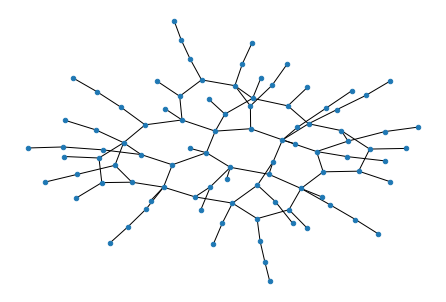

In [82]:
nx.draw_kamada_kawai(graph_initial, node_size=20)